In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split

/Users/ziranmin/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
data = pd.read_csv('train_cleaned.csv')

In [4]:
x = data.loc[:,'2ndFlrSF_log':'SaleType_WD']

In [5]:
y = data.loc[:,'SalePrice_log':'SalePrice_log']

In [8]:
train_x, test_x, train_y, test_y= train_test_split(x,y,test_size=0.2, random_state=0)

In [33]:
x.shape

(1456, 202)

In [6]:
reg = LinearRegression()

In [11]:
reg.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
reg.score(test_x, test_y)

0.8857014896518056

In [13]:
reg.coef_

array([[-4.19963203e-03,  1.07963476e-02,  2.68261713e-02,
        -5.90970188e-02,  1.87052507e-02, -1.25057639e-02,
         7.09408015e-03, -4.63797019e-03,  6.91741194e-04,
        -1.52153611e-02,  7.18909418e-02,  3.37747829e-02,
        -4.39673211e-02, -1.48957874e-03, -1.06102103e-03,
         2.74651846e-02, -5.37169366e-02,  6.11822438e-03,
         6.22612202e-04,  3.29077090e-02,  1.02336774e-01,
         9.47592935e-02,  1.09176245e-01,  2.44568136e-02,
        -1.76368481e-03,  7.54152552e-04,  5.27937640e-01,
         3.24250519e-02, -2.01892441e-02, -1.23465041e-01,
        -5.21254111e-04,  8.59871133e-02,  2.58117364e-02,
         1.04309999e-02, -1.11597564e-02, -4.22979997e-02,
        -7.73747404e-05, -1.04001894e-02,  1.36939695e-03,
         6.12009266e-03,  2.18121569e-01,  5.50593596e-02,
         1.60161201e-02,  2.84505194e-02, -5.06326151e-02,
         2.92862108e-02,  1.46304222e-01,  2.21135453e-02,
         1.99841502e-02,  5.76777051e-02,  1.09341908e-0

In [14]:
reg.predict(test_x)

array([[11.8095246 ],
       [12.36701417],
       [11.4319393 ],
       [11.86309876],
       [12.6045973 ],
       [11.83617184],
       [12.28257286],
       [12.65769488],
       [11.27529885],
       [11.73223405],
       [12.76679572],
       [12.2924995 ],
       [12.28429879],
       [12.37838483],
       [12.25347997],
       [12.1759344 ],
       [12.19764229],
       [11.66196414],
       [11.66937617],
       [12.09221531],
       [12.14621751],
       [11.80093826],
       [11.35903512],
       [11.71059517],
       [12.78387095],
       [11.65178756],
       [12.07836015],
       [11.81889244],
       [12.63118837],
       [12.31208608],
       [11.93725619],
       [12.05394142],
       [12.25150489],
       [11.83393151],
       [12.21407522],
       [11.63608937],
       [11.77219684],
       [11.60178087],
       [12.27060534],
       [11.82144403],
       [11.83632877],
       [11.87886476],
       [11.60907996],
       [12.07848404],
       [12.33938672],
       [12

In [15]:
np.mean((reg.predict(test_x) - test_y)**2)

SalePrice_log    0.017095
dtype: float64

# Cross Validation

In [7]:
from sklearn.model_selection import cross_val_score
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, x, y, scoring="neg_mean_squared_error", cv = 4))
    return(rmse)

In [8]:
rmse_cv(reg).mean()

0.12678336421560824

In [ ]:
0.12678336421560824

# See Coefficients

In [37]:
reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [38]:
reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [39]:
coef = pd.Series(reg.coef_.reshape(-1), index = x.columns)

In [46]:
coef.sort_values()[-41:-61:-1]

HouseStyle_1.5Unf       0.069520
Foundation_Slab         0.069111
SaleCondition_Normal    0.068375
Exterior2nd_AsphShn     0.067236
Condition1_PosN         0.067141
YearBuilt_log           0.064829
Exterior2nd_VinylSd     0.063220
HasOpenPorch_log        0.057942
Neighborhood_NoRidge    0.057658
MasVnrType_BrkFace      0.056696
OverallQual_log         0.056026
Exterior2nd_ImStucc     0.055893
MasVnrType_None         0.055693
BsmtFullBath_log        0.052764
SaleType_Oth            0.052534
Condition1_RRAn         0.052420
Exterior2nd_Wd Sdng     0.050477
Foundation_PConc        0.049953
HouseStyle_SFoyer       0.049869
CentralAir_Y            0.047771
dtype: float64

In [40]:
imp_coef = pd.concat([coef.sort_values()[-1:-21:-1],coef.sort_values()[10::-1]])

Text(0.5,1,'Coefficients in the Lasso Model')

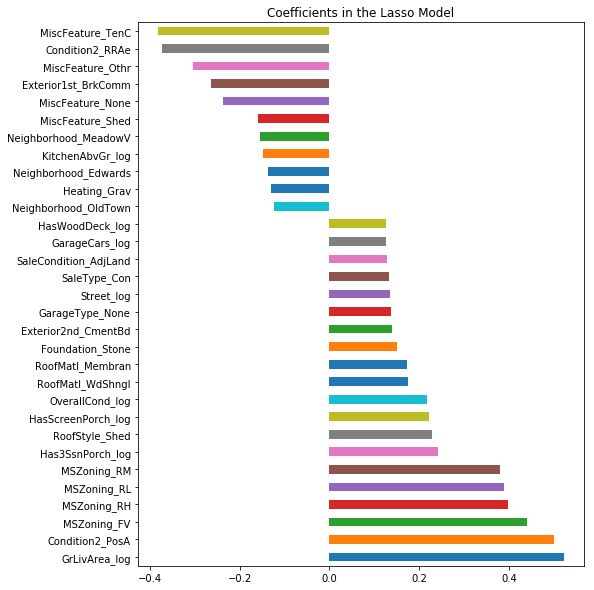

In [41]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

# Save Single Model Predicted Result for Kaggle Submission

In [40]:
data_sub = pd.read_csv('test_cleaned.csv')

In [41]:
data_sub_x = data_sub.loc[:,'2ndFlrSF_log':'SaleType_WD']

In [42]:
reg.predict(data_sub_x)

array([[11.60870887],
       [12.06579309],
       [12.13946832],
       ...,
       [12.06799603],
       [11.69142746],
       [12.27917456]])

In [43]:
log_y_sub = reg.predict(data_sub_x)

In [44]:
log_y_sub.shape

(1459, 1)

In [45]:
sub = np.exp(log_y_sub)

In [46]:
sub1 = pd.DataFrame(sub,columns = ['SalePrice'])

In [47]:
sub2 = pd.DataFrame(np.arange(1461,2920),columns = ['Id'])

In [48]:
sub2['SalePrice'] = sub1['SalePrice']

In [49]:
sub2.to_csv('sub.csv',index = False)

In [27]:
#sub2